# HW 4 Numerical linear algebra ( 50 pts)


## Please restart the kernel and run all before you submit !


## Your Name: Anshika

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Part 1: PCA (25 pts)

In this part, we will use PCA on some real dataset. 

Reuqirements:
1. You should write your own code. You are not allowed to use `sklear.decomposition.PCA` command. (5 pts)

2. Your solution should contain two functions. Function 1 takes data matrix X and integer k as inputs, and returns first k principal components. Function 2 takes data matrix X as input and a threshold $0\leq\eta\leq1$ as inputs, and returns an integer k such that the first $k$ principal components (smallest) has explained variance ratio more than $\eta$. **Your function should work for any data matrix X. In other words, you cannot use any global variable in your function.** (10 pts)

3. Visualize your new datasets in 2D and state your observations. (3 pts)

4. Report the smallest number of principal components reuired to explain 80% variance ratio for both datasets. (2 pts)

5. Function docstrings are required. You should also use inline comments and markdown to explain your code and make conclusions. (5 pts)

Hints:
1. You can assume that each row in $X$ represents a data.
2. Sample codes in lecture notes are helpful.

Datasets (last column is the correct labels):
1. diabetes dataset: url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/diabetes.csv"
2. swiss roll dataset: url = "https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/swiss.csv"

Updates:
1. In above datasets, the last column is the correct labels. So when you do PCA, you should not use the last column.
2. When you visualize your 2D data samples, you should use different colors for different classes(labels). The correct labels are included in the last column of each dataset.

In [2]:
url1 = 'https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/diabetes.csv'
diabetesDf = pd.read_csv(url1)

url2 = 'https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/03_Numerical_Linear_Algebra/swiss.csv'
swissRollDf = pd.read_csv(url2)

def PCAanalysis(X, k):
    """
    Perform PCA on the input data.

    Parameters:
    X (pandas data frame): Input data frame. The last column is the target variable
    k (int): Number of principal components to retain.

    Returns (numpy array):
    Transformed data after PCA
    """
    
    # extract values from data frame and convert to numpy array
    X_values = X.values
    
    # exclude last column
    X_excluding = X_values[:, :-1]
    
    # standardisation of data
    X_standard = (X_excluding - np.mean(X_excluding,axis=0))/np.std(X_excluding,axis=0)
    
    # performing SVD
    U, sigma, V = np.linalg.svd(X_standard)
    
    # select the top k eigenvectors
    top_k_eigenvectors = V[:k, :]
    
    X_pca = X_standard @ top_k_eigenvectors.T
    
    return X_pca

In [3]:
def find_k_threshold(X, eta):
    """
    Determine the number of principal components to retain based on a cumulative explained variance threshold.

    Parameters:
    X (pandas data frame): Input data frame. The last column is the target variable
    eta (float): 0<eta<1. Cumulative explained variance threshold.

    Returns (int):
    Number of principal components to explain at least eta % of total variance.
    """
    
    # extract values from data frame and convert to numpy array
    X_values = X.values
    
    # exclude last column
    X_excluding=X_values[:, :-1]
    
    # standardisation of data
    X_standard=(X_excluding-np.mean(X_excluding, axis=0))/np.std(X_excluding, axis=0)
    
    # performing SVD
    U, sigma, V=np.linalg.svd(X_standard)
    
    X_pca = X_standard@V.T
    
    # calculating variance of principle components
    a = np.var(X_pca,axis=0)
    
    # normalising to get explained variance ratio
    b = a/np.sum(a)
    
    # calculates the cumulative sum of the explained variance ratios
    cumsum = np.cumsum(b)
    
    k = np.argmax(cumsum>eta)+1
    return k

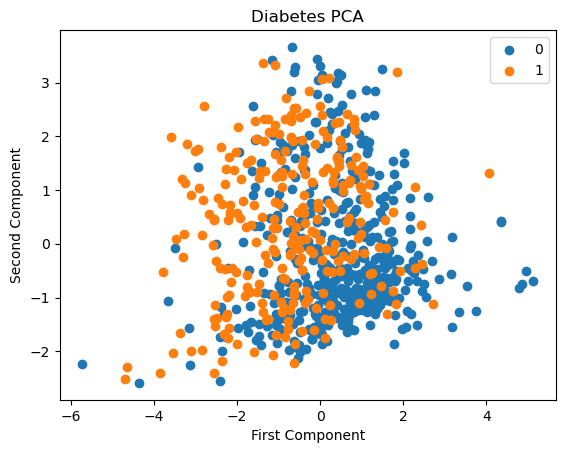

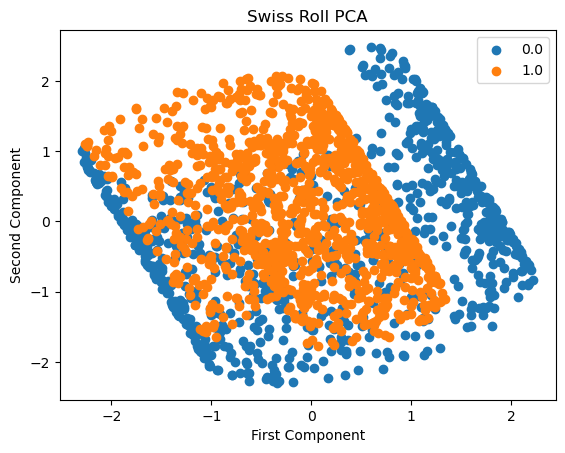

In [4]:
def visualise_PCA(X_pca, target, title):
    """
    Visualise the PCA resuls in a 2D scatter plot.

    Parameters:
    X_pca (numpy array): transformed data after PCA
    target (numpy array): target labels
    title (string): plot title

    Returns: None
    """
    # plot data points 
    for label in np.unique(target):
        indices = np.where(target == label)
        plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=label)
    
    # customising the plot
    plt.title(title)
    plt.xlabel('First Component')
    plt.ylabel('Second Component')
    plt.legend()
    plt.show()

# visualise diabetes dataset
diabetes_pca = PCAanalysis(diabetesDf, 2) 
target_diabetes = diabetesDf.iloc[:, -1]   # last column is target
visualise_PCA(diabetes_pca, target_diabetes, 'Diabetes PCA')

# visualise swiss roll dataset
swiss_roll_pca = PCAanalysis(swissRollDf, 2)  
target_swiss_roll = swissRollDf.iloc[:, -1]   # last column is target
visualise_PCA(swiss_roll_pca, target_swiss_roll, 'Swiss Roll PCA')

Conclusion: 
PCA does not work for the datasets of 'diabetes' and 'swiss roll'. This is because all the points are cluttered together, suggesting that PCA was unable to separate the data points based on their structure. Therefore, other dimension reduction techniques may be required instead.  

In [5]:
diabetes_ratio = find_k_threshold(diabetesDf, 0.8)
print(f'The smallest number of principle components to explain 80% variance ratio for the diabetes data set is {diabetes_ratio}')

The smallest number of principle components to explain 80% variance ratio for the diabetes data set is 5


In [6]:
swiss_ratio = find_k_threshold(swissRollDf, 0.8)
print(f'The smallest number of principle components to explain 80% variance ratio for the swiss roll data set is {swiss_ratio}')

The smallest number of principle components to explain 80% variance ratio for the swiss roll data set is 3


# Part 2: Least square (25 pts)

Consider the following least-square problem

$$ \mathop{ \mathrm{min} }_x \|Ax-b\|_2^2, $$

the solution can be written as a nice formula $x=(A^TA)^{-1}A^Tb$, which comes from normal equation $A^TAx = A^Tb$.


In this part, we want to compare the computational times of using matrix inverse and solve command.

Step 1: Write a function to generate matrix $A$ with m rows and N columns, and observation vector $b$ with m rows 1 column. Both matrix $A$ and vector $b$ are randomly generated by using `np.random`. The distribution of $A$ or $b$ can be either standard gaussian (`np.random.randn`) or uniform (`np.random.rand`). In other words, your function should allow four different choices, which are 1. gaussian $A$ and gaussian $b$, 2. gaussian $A$ and uniform $b$, 3. uniform $A$ and gaussian $b$, and 4. uniform $A$ and uniform $b$. (5 pts)

Step 2: Use function written in step 1 to generate $A$ and $b$ with fixed number of rows $m=10000$ and varied number of columns $N=[1000,2000,4000,8000,16000]$ (You can determine the distribution you want to use). Then, use matrix inverse and solve command to solve least square problem with $A$ and $b$. (5 pts)

Step 3: Visualization and conclusion. The first plot is computation time (y-axis) vs N (x-axis) for inverse matrix method and solve command method. The second plot is plotting log(time) (y-axis) vs log(N) (x-axis). You should add legends, titles, xlabels, ylabels and etc to make your plot clear. What is your conclusion? (10 pts, 5 pts each figure)


**Requirement:**

You should write docstring for your function and inline comments for your codes. (5 pts)

In [7]:
def generate_matrix_vector(m, N, distribution_One, distribution_Two):
    
    # Generate matrix A depending on whether the distribution is guassian or uniform
    if distribution_One == 'gaussian':
        A = np.random.randn(m, N) 
    elif distribution_One == 'uniform':
        A = np.random.rand(m, N) 
    
    # Generate vector b depending on whether the distribution is guassian or uniform
    if distribution_Two == 'gaussian':
        b = np.random.randn(m, 1)
    elif distribution_Two == 'uniform':
        b = np.random.rand(m, 1)
    
    return A, b

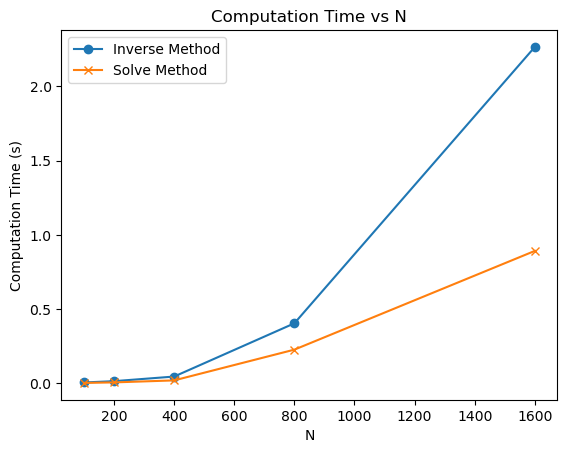

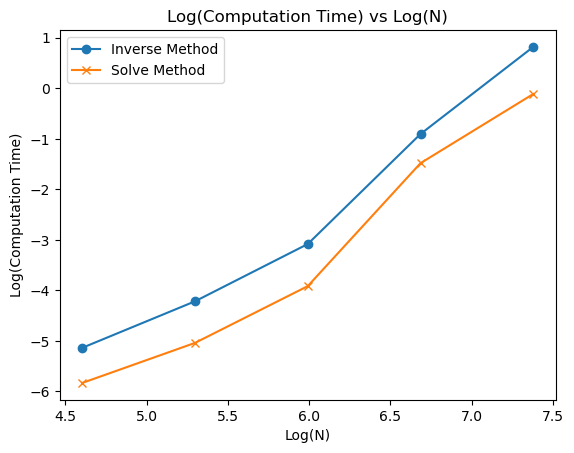

In [8]:
m = 10000
N_list = [100, 200, 400, 800, 1600] #cannot use N_list= [1000, 2000, 4000, 8000, 16000] because taking too long to compute
inverse_time = []
solve_time = []

for N in N_list:
    A, b = generate_matrix_vector(m, N, distribution_One='gaussian', distribution_Two='gaussian')
    
    start_time = time.time()
    x_inv = np.linalg.inv(A.T@A)@A.T@b
    end_time = time.time()
    computation_time = end_time - start_time
    inverse_time.append(computation_time)
    
    start_time2 = time.time()
    x2 = np.linalg.solve(A.T@A, A.T@b)
    end_time2 = time.time()
    computation_time2 = end_time2 - start_time2
    solve_time.append(computation_time2)
    

# Plot computation time vs N for inverse method
plt.plot(N_list, inverse_time, label='Inverse Method', marker='o')

# Plot computation time vs N for solve method
plt.plot(N_list, solve_time, label='Solve Method', marker='x')

plt.xlabel('N')
plt.ylabel('Computation Time (s)')
plt.title('Computation Time vs N')
plt.legend()
plt.show()
    
    
# Plot log(time) vs log(N) for inverse method
plt.plot(np.log(N_list), np.log(inverse_time), label='Inverse Method', marker='o')

# Plot log(time) vs log(N) for solve method
plt.plot(np.log(N_list), np.log(solve_time), label='Solve Method', marker='x')

plt.xlabel('Log(N)')
plt.ylabel('Log(Computation Time)')
plt.title('Log(Computation Time) vs Log(N)')
plt.legend()
plt.show()

Conclusion:
As the number of columns increases, the computation time increases for both inverse and solve methods in a slight exponential manner. However, the increase in computational time is more dramatic for the inverse method than it is for the solve method